In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,mean_squared_error,accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Titanic-Dataset.csv')

In [3]:
dataset.shape

(891, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
dataset.drop(columns=["Cabin"],inplace=True)

In [17]:
dataset.fillna(dataset['Age'].mean(),inplace=True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [20]:
dataset.shape

(891, 11)

In [21]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [22]:
dataset.corr()

/tmp/ipykernel_13056/2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [65]:
dataset['Fare']=dataset['Fare'].astype('int64')

In [66]:
dataset['Age']=dataset['Age'].astype('int64')

In [67]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Embarked     891 non-null    object
dtypes: int64(7), object(4)
memory usage: 76.7+ KB


In [114]:
numerical_features = dataset.columns[dataset.dtypes == 'int64']

In [115]:
numerical_features

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [116]:
numerical_features_df = dataset[numerical_features]

In [78]:
numerical_features_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22,1,0,7
1,2,1,1,38,1,0,71
2,3,1,3,26,0,0,7
3,4,1,1,35,1,0,53
4,5,0,3,35,0,0,8
...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13
887,888,1,1,19,0,0,30
888,889,0,3,29,1,2,23
889,890,1,1,26,0,0,30


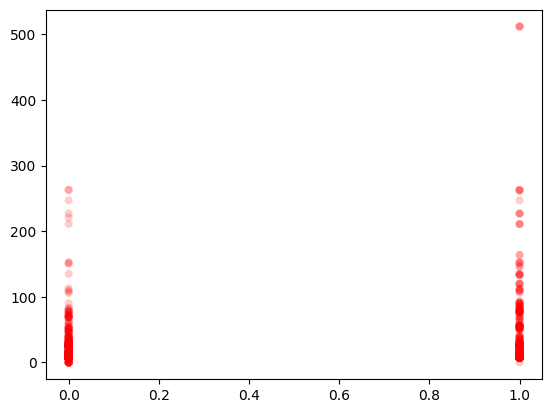

In [93]:
plt.scatter(numerical_features_df['Survived'],numerical_features_df['Fare'],
           ls=':'
            ,marker='8'
            ,color='red'
            ,alpha=0.2
            ,linewidths=0.1)


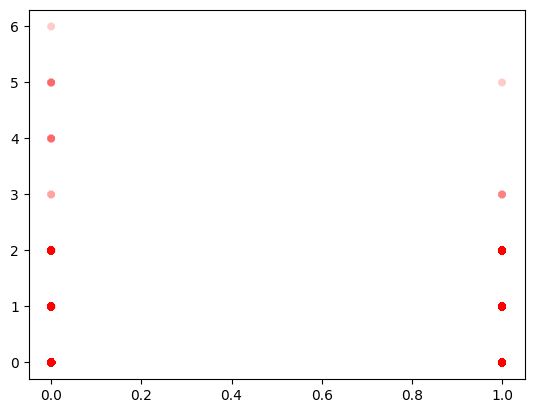

In [94]:
plt.scatter(numerical_features_df['Survived'],numerical_features_df['Parch'],
           ls=':'
            ,marker='8'
            ,color='red'
            ,alpha=0.2
            ,linewidths=0.1)

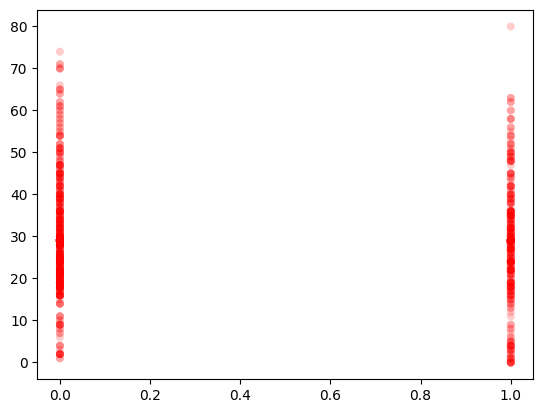

In [95]:
plt.scatter(numerical_features_df['Survived'],numerical_features_df['Age'],
           ls=':'
            ,marker='8'
            ,color='red'
            ,alpha=0.2
            ,linewidths=0.1)

In [96]:
# data splitting

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
889,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
np.corrcoef(numerical_features_df['Survived'],numerical_features_df['Fare'])[0][1]

0.2574818995542945

In [126]:
features_list = []

def get_corr(a='Survived'):
    
    for i in numerical_features_df.columns:
        corr_val = np.corrcoef(numerical_features_df[a],numerical_features_df[i])[0][1]
        if corr_val > -0.1:
            features_list.append(i)

In [127]:
get_corr()

In [128]:
features_list

['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Fare']

In [129]:
best_features = numerical_features_df[features_list]

In [138]:
best_features_predictors = best_features[best_features.columns[best_features.columns != 'Survived']]

In [139]:
best_features_target = best_features[best_features.columns[best_features.columns == 'Survived']]

In [140]:
best_features_predictors

,PassengerId,Age,SibSp,Parch,Fare
0,1,22,1,0,7
1,2,38,1,0,71
2,3,26,0,0,7
3,4,35,1,0,53
4,5,35,0,0,8
...,...,...,...,...,...
886,887,27,0,0,13
887,888,19,0,0,30
888,889,29,1,2,23
889,890,26,0,0,30


In [141]:
best_features_target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [158]:
# split the data

features_train ,features_test ,targets_train ,targets_test = train_test_split(best_features_predictors,
                                                                         best_features_target,
                                                                        test_size=0.3,
                                                                        shuffle=True,
                                                                        random_state=42)

In [155]:
features_train

,PassengerId,Age,SibSp,Parch,Fare
445,446,4,0,2,81
650,651,29,0,0,7
172,173,1,1,1,11
450,451,36,1,2,27
314,315,43,1,1,26
...,...,...,...,...,...
106,107,21,0,0,7
270,271,29,0,0,31
860,861,41,2,0,14
435,436,14,1,2,120


In [156]:
model = LogisticRegression(max_iter=100)

In [167]:
model.fit(features_train,targets_train)

/home/applmgr/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [162]:
target_pred = model.predict(features_test)

In [164]:
target_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0])

In [172]:
targets_test['predicted_target'] = target_pred

In [181]:
accuracy = sum(targets_test['Survived'] == targets_test['predicted_target'])/targets_test.shape[0] * 100

In [182]:
accuracy

68.28358208955224

In [184]:
recall_score(targets_test['Survived'],targets_test['predicted_target'])

0.3063063063063063

In [185]:
precision_score(targets_test['Survived'],targets_test['predicted_target'])

0.8095238095238095

In [187]:
sklearn.metrics.confusion_matrix(targets_test['Survived'],targets_test['predicted_target'])

array([[149,   8],
       [ 77,  34]])

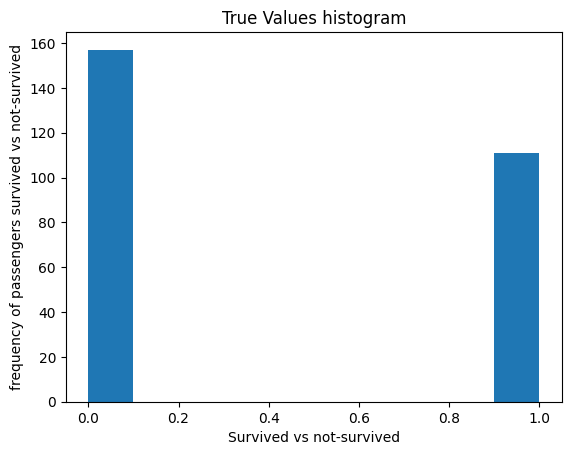

In [190]:
plt.hist(targets_test['Survived'])
plt.xlabel('Survived vs not-survived')
plt.ylabel('frequency of passengers survived vs not-survived')
plt.title('True Values histogram');

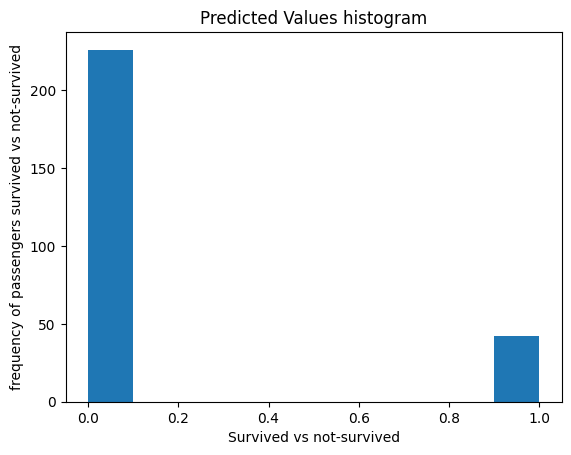

In [192]:
plt.hist(targets_test['predicted_target'])
plt.xlabel('Survived vs not-survived')
plt.ylabel('frequency of passengers survived vs not-survived')
plt.title('Predicted Values histogram');